##  Using the ARIMA Model for forecasting the daily visits in Emergency Department

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

C:\Users\wujin\anaconda3\envs\rstudio\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [2]:
series = pd.read_csv('time series data.csv')
print(series.head(30))

          DATE   No
0   10/09/2007  325
1   10/10/2007  417
2   10/11/2007  556
3   10/12/2007  467
4   10/13/2007  430
5   10/14/2007  434
6   10/15/2007  434
7   10/16/2007  416
8   10/17/2007  465
9   10/18/2007  575
10  10/19/2007  432
11  10/20/2007  474
12  10/21/2007  436
13  10/22/2007  364
14  10/23/2007  359
15  10/24/2007  411
16  10/25/2007  490
17  10/26/2007  408
18  10/27/2007  379
19  10/28/2007  398
20  10/29/2007  410
21  10/30/2007  374
22  10/31/2007  401
23  11/01/2007  484
24  11/02/2007  445
25  11/03/2007  405
26  11/04/2007  396
27  11/05/2007  386
28  11/06/2007  468
29  11/07/2007  459


In [3]:
series['DATE'] = pd.to_datetime(series['DATE']) 
series = series.set_index('DATE')
series.head(30)

,No
DATE,
2007-10-09,325
2007-10-10,417
2007-10-11,556
2007-10-12,467
2007-10-13,430
2007-10-14,434
2007-10-15,434
2007-10-16,416
2007-10-17,465


### Visualize Time Series Data

In [4]:
df_No = series['No'] 
df_No.head(30)

DATE
2007-10-09    325
2007-10-10    417
2007-10-11    556
2007-10-12    467
2007-10-13    430
2007-10-14    434
2007-10-15    434
2007-10-16    416
2007-10-17    465
2007-10-18    575
2007-10-19    432
2007-10-20    474
2007-10-21    436
2007-10-22    364
2007-10-23    359
2007-10-24    411
2007-10-25    490
2007-10-26    408
2007-10-27    379
2007-10-28    398
2007-10-29    410
2007-10-30    374
2007-10-31    401
2007-11-01    484
2007-11-02    445
2007-11-03    405
2007-11-04    396
2007-11-05    386
2007-11-06    468
2007-11-07    459
Name: No, dtype: int64

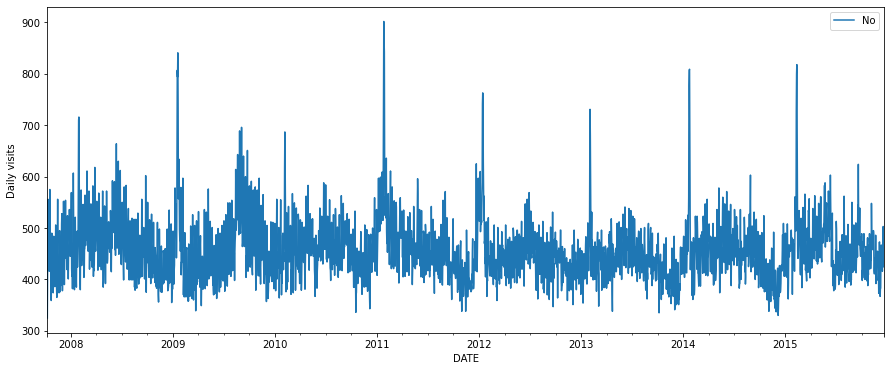

In [5]:
plt.figure(figsize=(15,6)) 
df_No.plot() 
plt.ylabel('Daily visits') 
plt.legend()

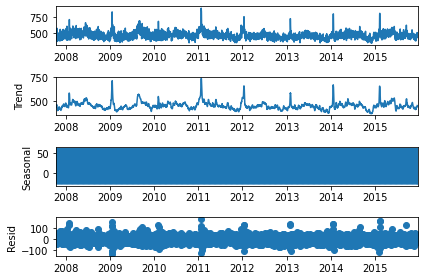

In [6]:
decomp = seasonal_decompose(series)
decomp.plot()
plt.show()

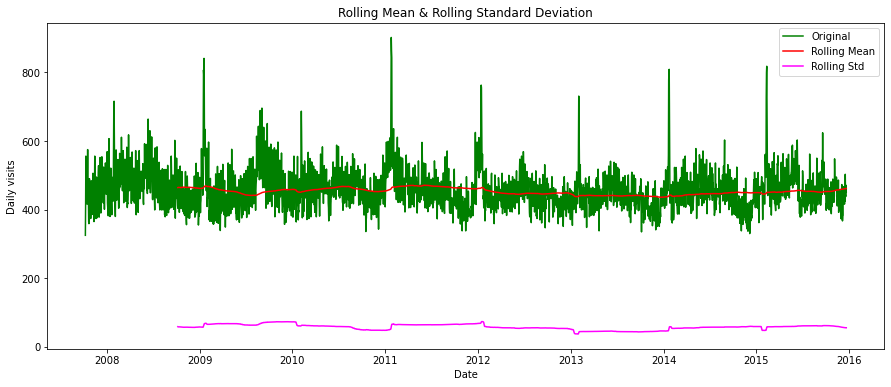

In [7]:
rolling_mean = df_No.rolling(window = 365).mean() 
rolling_std = df_No.rolling(window = 365).std() 
plt.figure(figsize=(15,6)) 
plt.plot(series['No'], color = 'green', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.xlabel('Date') 
plt.ylabel('Daily visits') 
plt.legend()

Augmented Dickey-Fuller Test(ADF Test)

In [8]:
adf_test = adfuller(df_No) 
print('ADF Statistics: {}'.format(adf_test[0])) 
print('p-value: {}'.format(adf_test[1])) 
for key, value in adf_test[4].items(): 
    print('Critical Values Over {}: {}'.format(key, value)) 

ADF Statistics: -7.27460903145954
p-value: 1.5562045233453172e-10
Critical Values Over 1%: -3.432556665038245
Critical Values Over 5%: -2.862514960237111
Critical Values Over 10%: -2.5672889976624265


In [9]:
# Import the library
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

X = df_No.values 
size = 355 
train, test = X[0:len(X)-size], X[len(X)-size+1:len(X)]

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(train,
                          start_p = 1,
                          start_q = 1,
                          max_p = 3,
                          max_q = 3,
                          m = 12,
                          start_P = 0,
                          seasonal = True,
                          d = None,
                          D = 1,
                          trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=4.59 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=30299.770, Time=0.36 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=28824.912, Time=4.02 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.61 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=30297.771, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=29487.896, Time=0.75 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=28297.589, Time=13.00 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=15.99 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.43 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=29277.938, Time=7.67 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=28299.535, Time=18.18 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=28299.538, Time=19.07 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=28524.494, Time=16.32 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=28262.339, Time=49.13 sec
 ARIMA(2,0,1)(1,1,0)[12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 2641
Model:             SARIMAX(3, 0, 2)x(2, 1, [], 12)   Log Likelihood              -13871.528
Date:                             Wed, 11 May 2022   AIC                          27759.056
Time:                                     16:22:45   BIC                          27806.050
Sample:                                          0   HQIC                         27776.073
                                            - 2641                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8832      0.013    147.767      0.000       1.858       1.908
ar.L2         -1.7829      0.016   -114.640      0.000      -1.813      -1.752
ar.L3          0.6312      0.012     52.549      0.000       0.608       0.655
ma.L1         -1.2514      0.010   -120.302      0.000      -1.272      -1.231
ma.L2          0.9380      0.010     95.278      0.000       0.919       0.957
ar.S.L12      -0.6872      0.018    -37.802      0.000      -0.723      -0.652
ar.S.L24      -0.2286      0.018    -12.740      0.000      -0.264      -0.193
sigma2      2206.7128     49.641     44.454      0.000    2109.419    2304.007
===================================================================================
Ljung-Box (L1) (Q):                  83.67   Jarque-Bera (JB):               310.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima.model import ARIMA
history = [x for x in train] 
predictions = list() 
for i in range(len(test)): 
    model = ARIMA(history, order=(2,1,2)) 
    model_fit = model.fit() 
    results = model_fit.forecast() 
    pred = results[0] 
    predictions.append(pred) 
    true = test[i] 
    history.append(true) 
    print('predicted= {}, True observations= {}'.format(pred, true))  

error = mean_squared_error(test, predictions) 
print('Test MSE: {}'.format(error)) 

predicted= 427.5607589431477, True observations= 432
predicted= 421.79703194517776, True observations= 416
predicted= 419.1218654907576, True observations= 467
predicted= 445.01953293800693, True observations= 408
predicted= 411.88435847863775, True observations= 462
predicted= 446.7111921080115, True observations= 404
predicted= 407.55113761292967, True observations= 508
predicted= 476.94590532373553, True observations= 459
predicted= 437.5610952412191, True observations= 430
predicted= 434.90688917410495, True observations= 362
predicted= 384.55353105731683, True observations= 392
predicted= 412.87272570676726, True observations= 467
predicted= 444.0964740932959, True observations= 465
predicted= 450.55583031885055, True observations= 444
predicted= 433.8121909182982, True observations= 465
predicted= 452.4922431956787, True observations= 467
predicted= 448.5358787100521, True observations= 455
predicted= 447.5611812805584, True observations= 455
predicted= 444.4265687458958, True ob

predicted= 544.8875564287189, True observations= 528
predicted= 513.0278255000535, True observations= 484
predicted= 495.483809419979, True observations= 485
predicted= 490.99217716086997, True observations= 474
predicted= 487.6061814236329, True observations= 548
predicted= 529.0051141795044, True observations= 538
predicted= 522.1967708900572, True observations= 603
predicted= 564.4943154722921, True observations= 555
predicted= 532.6746528096235, True observations= 499
predicted= 507.11415532899713, True observations= 508
predicted= 509.20283296286254, True observations= 425
predicted= 460.85726800807225, True observations= 481
predicted= 495.5260232743801, True observations= 506
predicted= 504.2273490666656, True observations= 529
predicted= 521.483580950094, True observations= 436
predicted= 461.8075564991176, True observations= 388
predicted= 439.6333935557529, True observations= 436
predicted= 461.0858993176045, True observations= 394
predicted= 435.3328363137356, True observati

predicted= 509.1767834608299, True observations= 496
predicted= 470.4941689843995, True observations= 477
predicted= 471.54951508373694, True observations= 493
predicted= 473.1516558705008, True observations= 458
predicted= 459.6593581360305, True observations= 461
predicted= 457.72861039471485, True observations= 465
predicted= 463.26049351328817, True observations= 495
predicted= 478.662176996654, True observations= 488
predicted= 476.2689812482956, True observations= 417
predicted= 434.04621189951433, True observations= 411
predicted= 433.22727424497015, True observations= 411
predicted= 428.92805832091585, True observations= 441
predicted= 448.3624200485424, True observations= 433
predicted= 439.4874010625015, True observations= 428
predicted= 439.57328933119055, True observations= 486
predicted= 470.9909150223129, True observations= 392
predicted= 414.8949636064494, True observations= 415
predicted= 432.52934359784666, True observations= 401
predicted= 417.4860017168783, True obse

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
X = df_No.values 
size = 355 
train, test = X[0:len(X)-size], X[len(X)-size+1:len(X)]
history = [x for x in train] 
predictions = list() 
for i in range(len(test)): 
    warnings.filterwarnings("ignore")
    model = SARIMAX(history, order=(1,1,5), seasonal_order =(2,0,1,7), error_action ='ignore') 
    model_fit = model.fit(disp=0) 
    results = model_fit.forecast() 
    pred = results[0] 
    predictions.append(pred) 
    true = test[i] 
    history.append(true) 
    print('predicted= {}, True observations= {}'.format(pred, true))  

error = mean_squared_error(test, predictions) 
print('Test MSE: {}'.format(error))

predicted= 480.9049572493368, True observations= 432
predicted= 423.5017928027082, True observations= 416
predicted= 392.7530037210887, True observations= 467
predicted= 444.4518176942268, True observations= 408
predicted= 422.51791047371694, True observations= 462
predicted= 452.0560276726745, True observations= 404
predicted= 424.9539280311588, True observations= 508
predicted= 507.09614167009613, True observations= 459
predicted= 448.5808188854748, True observations= 430
predicted= 411.9235659658704, True observations= 362
predicted= 376.9583657123451, True observations= 392
predicted= 396.1096446282984, True observations= 467
predicted= 461.80378086429704, True observations= 465
predicted= 485.9652112294842, True observations= 444
predicted= 481.10123267598726, True observations= 465
predicted= 421.9712505524595, True observations= 467
predicted= 417.01871502838515, True observations= 455
predicted= 446.36578330583876, True observations= 455
predicted= 460.2686117622584, True obser

predicted= 524.9397265017727, True observations= 528
predicted= 491.24698506303633, True observations= 484
predicted= 458.6452306907547, True observations= 485
predicted= 467.3378292616735, True observations= 474
predicted= 471.50596996076973, True observations= 548
predicted= 523.0536680201426, True observations= 538
predicted= 555.1977855654638, True observations= 603
predicted= 553.8078607976271, True observations= 555
predicted= 497.6594601047081, True observations= 499
predicted= 459.1641836726796, True observations= 508
predicted= 480.92046906311367, True observations= 425
predicted= 460.9359411423651, True observations= 481
predicted= 481.1420362711251, True observations= 506
predicted= 531.2194998845006, True observations= 529
predicted= 518.1223447769821, True observations= 436
predicted= 433.2179010591869, True observations= 388
predicted= 389.5696122208987, True observations= 436
predicted= 425.33325253309016, True observations= 394
predicted= 450.4409318607212, True observa

predicted= 489.98530464100924, True observations= 496
predicted= 477.43565105971805, True observations= 477
predicted= 453.5910487513896, True observations= 493
predicted= 461.39309642002297, True observations= 458
predicted= 454.75763252583465, True observations= 461
predicted= 469.99162614535186, True observations= 465
predicted= 508.5193754687808, True observations= 495
predicted= 460.992643282693, True observations= 488
predicted= 462.1301914351631, True observations= 417
predicted= 429.01255420883973, True observations= 411
predicted= 414.9225163034817, True observations= 411
predicted= 427.5377588716668, True observations= 441
predicted= 458.08902836650987, True observations= 433
predicted= 492.26481997542834, True observations= 428
predicted= 422.91612402724917, True observations= 486
predicted= 445.5738366636705, True observations= 392
predicted= 410.90246248921324, True observations= 415
predicted= 422.7367557918822, True observations= 401
predicted= 424.71931461056016, True o

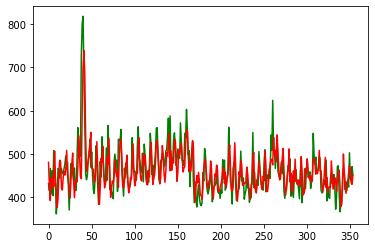

In [12]:
plt.plot(test, color='green') 
plt.plot(predictions, color='red') 
plt.show()

In [13]:
# calculate for Testing set
mae = np.mean(np.abs(predictions - test))
mae

29.98060557340073

In [14]:
mape = np.mean(np.abs(predictions - test)/np.abs(test))
mape

0.06340042063226002